LLP Events in SuperK
===

Given a flux of pions from cosmic ray interactions, we want to estimate the number of events in a detector such as SuperK. As a first estimate, we consider the relationship,

$$N_{\text { events }} =A_{\text { det }}\left[\int d E \frac{d \Phi_{\mathrm{LLP}}}{d E}\right] P_{\text { det }}  \approx \frac{V_{\text { det }}}{\ell_{\text { det }}}\left[\int d E \frac{d \Phi_{\mathrm{LLP}}}{d E}\right] \frac{\ell_{\text { det }}}{\ell_{\text { decay }}} =\frac{V_{\text { det }}}{\ell_{\text { decay }}}\left[\int d E \frac{d \Phi_{\pi}}{d E}\right] \operatorname{Br}\left(\pi^{0} \rightarrow A \gamma\right)$$

where $P_{\mathrm{det}}$ is the probability of a particle decaying inside the detector. It is given by,

$$P_{\mathrm{det}} =\exp \left[-\frac{\ell_{\mathrm{prod}}}{\ell_{\mathrm{decay}}}\right]-\exp \left[-\frac{\ell_{\mathrm{prod}}+\ell_{\mathrm{det}}}{\ell_{\mathrm{decay}}}\right] =\exp \left[-\frac{\ell_{\mathrm{prod}}}{\ell_{\mathrm{decay}}}\right]\left(1-\exp \left[-\frac{\ell_{\mathrm{det}}}{\ell_{\mathrm{decay}}}\right]\right) \approx \frac{\ell_{\mathrm{det}}}{\ell_{\mathrm{decay}}}$$

where $\ell_{\mathrm{decay}}$ is the decay length of the LLP, $\ell_{\mathrm{prod}}$ is the distance between the production point and entry point, and $\ell_{\mathrm{det}}$ is the detector's size. The last approximation is value if $\ell_{\mathrm{decay}} \gg \ell_{\mathrm{prod}}, \ell_{\mathrm{det}}$.

First then we obtain the pion flux from CRMC.

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

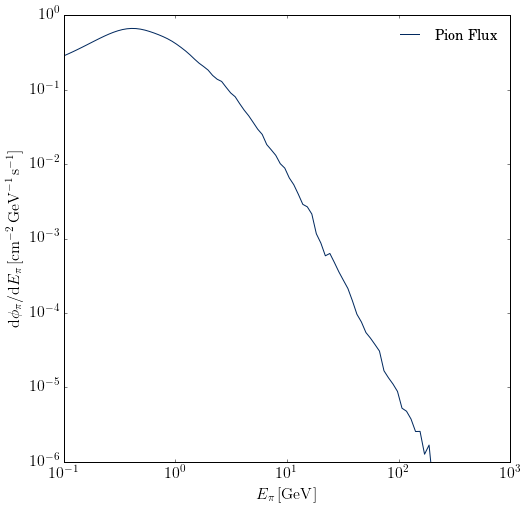

In [2]:
pion_df = pd.read_csv('pion_flux.csv')
pion_df['dPhidE'] *= 2.529335739713634*np.power(10.0, 25)

def pion_flux_kernel(energies, pion_flux):
    r"""
    Interpolation of the pion flux per GeV per square centimetre per second.
    
    Parameters
    ----------
    pion_flux : float
        flux to fit on
    
    Returns
    -------
    kernel : scipy.interpolate.interp1d.kernel
        kernel for pion flux per GeV per square centimetre per second
    """
    kernel = interp1d(x=energies, y=pion_flux)
    return kernel

pion_flux = pion_flux_kernel(pion_df['Epi'], pion_df['dPhidE'])

E_arr = np.logspace(-1, 3)
plt.figure(figsize=(8,8))
plt.loglog(E_arr, pion_flux(E_arr), label='Pion Flux')
plt.xlabel(r'$E_\pi \, [\mathrm{GeV}]$')
plt.ylabel(r'$\mathrm{d}\phi_{\pi}/\mathrm{d}E_\pi \,$'
               + r'$[\mathrm{cm}^{-2} \, \mathrm{GeV}^{-1} \, \mathrm{s}^{-1}]$')
plt.ylim(np.power(10.0, -6),)
plt.legend(fontsize=14)
plt.show()

Then we can calculate,

$$\Phi^0_\pi \equiv \int_{10^{-1}}^{10^3}{\mathrm{d}E_\pi \, \frac{\mathrm{d}\phi_\pi}{\mathrm{d}E_\pi}}$$

where the limits come from the interpolation. This gives,

$$\Phi^0_\pi \simeq 1.14 \, \mathrm{cm}^{-2} \, \mathrm{s}^{-1}$$

Then, the number of events is just,

$$N_{\mathrm{events}} [\mathrm{s}^{-1}] = \Phi_\pi^0 \cdot V_{\mathrm{det}} \cdot \frac{\mathrm{Br}(\pi \rightarrow A \gamma)}{\ell_{\mathrm{decay}}}$$

In [3]:
def phi0(pion_flux_fun, a=10**(-1), b=10**3):
    return quad(pion_flux_fun, a=a, b=b)[0]
print('Phi0: {}'.format(phi0(pion_flux)))

def vol_det_cm(height_m, diameter_m):
    return height_m * np.pi * np.power(diameter_m/2.0, 2.0) * np.power(10.0, 6.0)
Vdet = vol_det_cm(height_m=41.4, diameter_m=39.3)
print('Volume of detector: {:.3g} cubic centimetres'.format(Vdet))

Phi0: 1.138871677947746
Volume of detector: 5.02e+10 cubic centimetres


To get the volume we use the same numbers as Miguel where he takes the SuperK detector to be $41.4 \, \mathrm{m}$ high, with a diameter of $39.3 \, \mathrm{m}$. This gives a detector volume of,

$$V_{\mathrm{det}} \simeq 5 \times 10^{10} \, \mathrm{cm}^3$$

With these definitions in mind, we can then compute,

$$N_{\mathrm{events}}\left(\mathrm{Br}(\pi \rightarrow A \gamma), \ell_{\mathrm{decay}}\right) \, [\mathrm{s}^{-1}] \simeq 5.7 \times 10^{5} \left(\frac{\Phi_\pi^0}{1.14 \, \mathrm{cm}^{-2} \, \mathrm{s}^{-1}}\right) \left(\frac{V_{\mathrm{det}}}{5 \times 10^{10} \, \mathrm{cm}^{3}}\right) \frac{\mathrm{Br}(\pi \rightarrow A \gamma)}{\ell_{\mathrm{decay}}/\mathrm{km}}$$

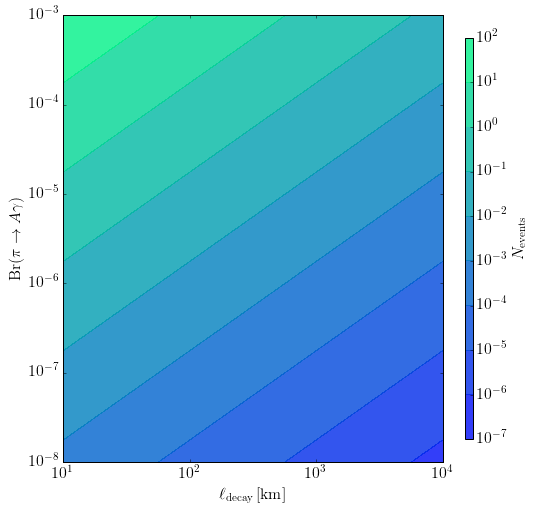

In [4]:
from matplotlib import ticker, cm

def Nevents(br, l, 
            Phi0=phi0(pion_flux), 
            Vdet=vol_det_cm(height_m=41.4, diameter_m=39.3)):
    return Phi0*Vdet*np.power(10.0, -5)*br*np.power(l, -1.0)

l = np.logspace(1, 4)
br = np.logspace(-8, -3)

L, BR = np.meshgrid(l, br)

N = Nevents(BR, L)
plt.figure(figsize=(8,8))
plt.xlabel(r'$\ell_{\mathrm{decay}} \, [\mathrm{km}]$')
plt.ylabel(r'$\mathrm{Br}(\pi \rightarrow A \gamma)$')
plt.xscale('log')
plt.yscale('log')
plt.contourf(L, BR, N,
            locator=ticker.LogLocator(), 
            cmap=cm.winter)
plt.colorbar(label=r'$N_{\mathrm{events}}$')
plt.show()